# Detección MAP y ML para función de distribución de Poisson (canal de fibra óptica)
1) Grafique en una misma figura las probabilidades condicionales P(Y|H) para H=0 y H=1 del Ejemplo 2.4 del libro. Elija parámetros para la función de densidad de Poisson y saque conclusiones

2) Genere una distribución de Poisson y realice su histograma

3) Determine las regiones de decisión MAP y ML. Para el caso MAP, proponga una distribución de probabilidad de las hipótesis

4) Estime estadísticamente la probabilidad error y realice una gráfica de probabilidad de error vs Intensidad[DB]

1) Grafique en una misma figura las probabilidades condicionales P(Y|H) para H=0 y H=1 del Ejemplo 2.4 del libro. Elija parámetros para la función de densidad de Poisson y saque conclusiones

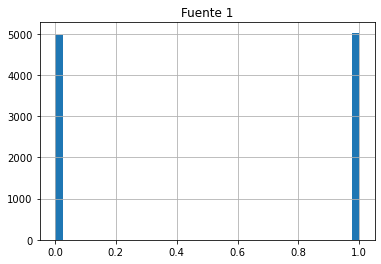

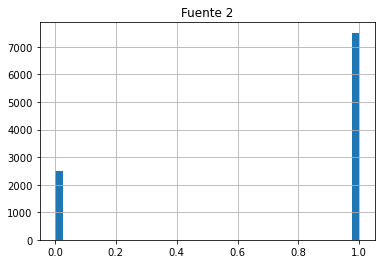

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

muestras = 10000

cardinalidad = 2

Ma = 0
Mb = 1

Pa = 0.5
Pb = 0.5

Pa2 = 0.25
Pb2 = 0.75
mensajes = [Ma, Mb]

arr = np.random.choice(mensajes, muestras, p=[Pa, Pb])
arr2 = np.random.choice(mensajes, muestras, p=[Pa2, Pb2])

plt.figure(0)
plt.title("Fuente 1")
plt.hist(arr, bins=40, align='mid', linewidth=1)
plt.grid()

plt.figure(1)
plt.title("Fuente 2")
plt.hist(arr2, bins=40, align='mid', linewidth=1)
plt.grid()

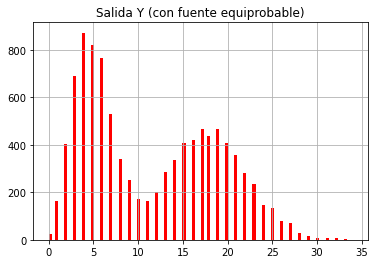

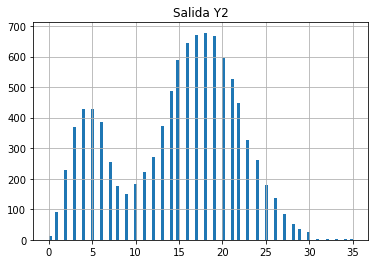

In [9]:
l0=5
l1=18

Y = np.zeros(muestras, dtype = int)
Y2 = np.zeros(muestras, dtype = int)
j=0
for a in range(0, muestras):
    if (arr[a]==0):
        Y[j]=np.random.poisson(l0)
    if (arr[a]==1):
        Y[j]=np.random.poisson(l1)
    
    if (arr2[a]==0):
        Y2[j]=np.random.poisson(l0)
    if (arr2[a]==1):
        Y2[j]=np.random.poisson(l1)
        
    j=j+1

plt.figure(0) #plot salida 'Y'
plt.title("Salida Y (con fuente equiprobable)")
plt.hist(Y, bins = 100, color="red")
plt.grid()

plt.figure(1) #plot salida 'Y2'
plt.title("Salida Y2")
plt.hist(Y2, bins = 100)
plt.grid()

Como se vera mas adelante en el punto 2) , con un lambda pequeño la distribucion de Poisson es asimetrica, y conforme el parametro lambda sea mayor, mas se parecera a una distribucion normal. Ademas, el parametro tambien desplaza la "acumulacion de valores" mostrados en el histograma. Es por esto que cuanto mas distantes sean l0 y l1 mas facil es la deteccion y se producen menos errores. 

2) Genere una distribución de Poisson y realice su histograma

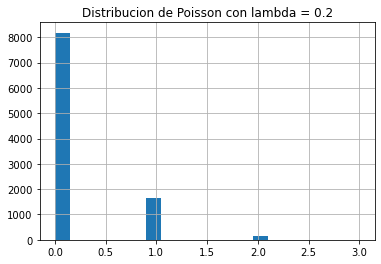

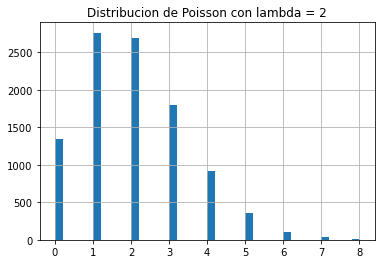

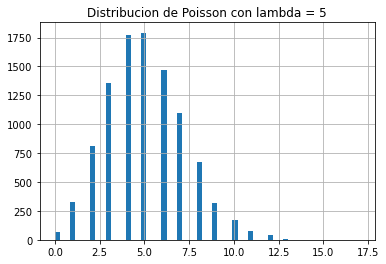

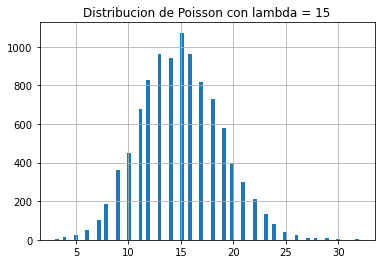

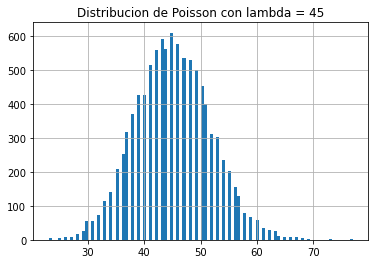

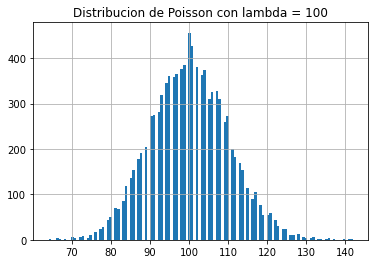

In [4]:
lam=[0.2,2,5,15,45,100]
j=0
for l in lam:
    pois=np.random.poisson(l,muestras)
    plt.figure(j)
    b=(j+1)*20
    plt.hist(pois,bins=b)
    plt.title("Distribucion de Poisson con lambda = {}".format(l))
    plt.grid()
    j=j+1

3) Determine las regiones de decisión MAP y ML. Para el caso MAP, proponga una distribución de probabilidad de las hipótesis

Threshold:  11.5
Cantidad de errores:  294
Probabilidad de error:  0.0294


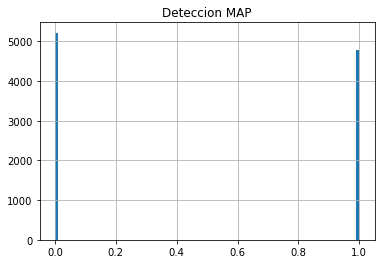

In [5]:
#threshold = ( (l1-l0)  +  np.log(Pa/Pb)  )  / (np.log(l1/l0) )
#threshold = (Pa/Pb)/(np.log(l1/l0))
#theta = (sigma**2*np.log(n) + (np.linalg.norm(code1)**2 - np.linalg.norm(code0)**2)/2)/d

threshold = (0.5*(l0+l1)*np.log(Pa/Pb)/(l1-l0))+(l0+l1)/2

detectado = np.where(Y<threshold, 0, 1)
errores=0
for a in range(muestras):
    if(detectado[a]!=arr[a]):
        errores=errores+1
print ("Threshold: ", threshold)
print ("Cantidad de errores: ", errores)
print ("Probabilidad de error: ", errores/muestras)

plt.hist(detectado, bins = 100)
plt.title("Deteccion MAP")
plt.grid()

Threshold:  10.528150667716671
Cantidad de errores:  257
Probabilidad de error:  0.0257


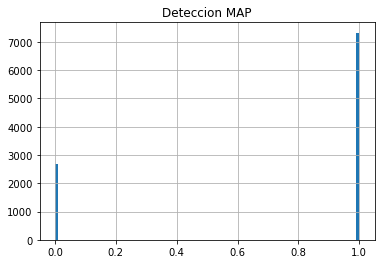

In [6]:
#threshold2 = ((l1-l0)+np.log(Pa2/Pb2))/(np.log(l1/l0))

threshold2 = (0.5*(l0+l1)*np.log(Pa2/Pb2)/(l1-l0))+(l0+l1)/2
detectado2 = np.where(Y2<threshold2, 0, 1)
errores=0
for a in range(muestras):
    if(detectado2[a]!=arr2[a]):
        errores=errores+1
print ("Threshold: ", threshold2)
print ("Cantidad de errores: ", errores)
print ("Probabilidad de error: ", errores/muestras)

plt.hist(detectado2, bins = 100)
plt.title("Deteccion MAP")
plt.grid()

4) Estime estadísticamente la probabilidad error y realice una gráfica de probabilidad de error vs SNR[DB]

La probabilidad de error con lamda0 =  5 es e = 0.0325
La probabilidad de error con lamda0 =  7 es e = 0.0579
La probabilidad de error con lamda0 =  9 es e = 0.1057
La probabilidad de error con lamda0 =  11 es e = 0.1802
La probabilidad de error con lamda0 =  13 es e = 0.2612
La probabilidad de error con lamda0 =  15 es e = 0.3609


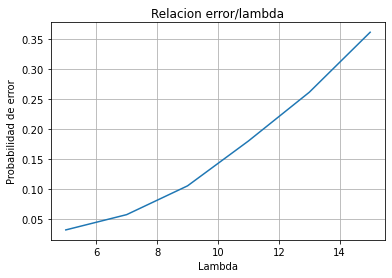

In [7]:
lam0 = np.arange(5,16,2) #vector de lambdas
lam1 = 18

Ma = 0
Mb = 1

Pa = 0.5
Pb = 0.5

mensajes = [Ma, Mb]

arr = np.random.choice(mensajes, muestras, p=[Pa, Pb])



e = np.zeros(len(lam0), dtype = float)

m=0

for l0 in lam0:
    #print("lam: ",l0)
    Y = np.zeros(muestras, dtype = int)
    j=0
    for a in range(0, muestras):
        if (arr[a]==0):
            Y[j]=np.random.poisson(l0)
        if (arr[a]==1):
            Y[j]=np.random.poisson(l1)
        j=j+1
    
    #threshold = ((l1-l0)+np.log(Pa/Pb))/(np.log(l1/l0))
    threshold = (0.5*(l0+l1)*np.log(Pa/Pb)/(l1-l0))+(l0+l1)/2

    detectado = np.where(Y<threshold, 0, 1)
    errores=0
    for i in range(0, muestras):
        if(detectado[i]!=arr[i]):
            errores=errores+1
    #print ("errores: ", errores)
    proberror=errores/muestras
    e[m]=proberror
    m=m+1

for a in range(len(lam)):
    print("La probabilidad de error con lamda0 = ",lam0[a], "es e =", e[a])


plt.title("Relacion error/lambda")
plt.xlabel("Lambda")
plt.ylabel("Probabilidad de error")
plt.plot(lam0, e)
plt.grid()